# Topic: National Health Insurance (NHI) in South Africa

## Introduction

South Africa is undergoing a significant healthcare reform with the development and implementation of the National Health Insurance (NHI) system. The NHI aims to provide universal healthcare coverage for all South African citizens and permanent residents, ensuring access to essential healthcare services regardless of income or employment status. This ambitious reform seeks to merge the public and private healthcare sectors into a unified system, with the primary objective of addressing disparities in healthcare quality and access across socio-economic groups. 

The NHI system is designed to fund healthcare through a central pool, combining general taxes and employer contributions to make medical care accessible to all, eliminating reliance on private medical schemes. To improve cost-efficiency, the system will regulate service and pharmaceutical pricing, and resources will be centrally managed. The phased rollout of the NHI will allow for pilot projects, evaluation, and gradual expansion to full national coverage.

This project will apply machine learning and data analysis to analyze trends, predict outcomes, and evaluate the potential impact of the NHI on healthcare service delivery, funding allocation, and public sentiment. By leveraging data-driven insights, this study will offer a practical assessment of the NHI’s impact on healthcare reform in South Africa.


# Dataset Relevance and Forecasting Potential

## Overview of the Dataset
The dataset contains the following columns:
- **Date**: The date associated with each expense.
- **Expense_Category**: The category of the expense, such as "Staffing," "Supplies," or "Equipment."
- **Amount**: The monetary amount spent on each expense.
- **Description**: Further details about the specific expense, e.g., "Surgical masks" or "Ventilators."

## Relevance to the NHI Cost Forecasting Scenario
This dataset provides information on various healthcare-related expenses, which can be relevant for estimating the costs associated with implementing the National Health Insurance (NHI) system in South Africa. Given that the dataset captures spending details across different categories, it could be useful for analyzing trends in healthcare costs. If these categories cover critical areas like hospitalization, medication, and general practitioner services, this data can serve as a foundation for developing a forecasting model to estimate NHI expenses.

## Forecasting Potential
With its time-based expense data, this dataset has potential for forecasting future costs using time series modeling tools like Facebook Prophet. However, the dataset may require additional information to support a robust NHI cost forecast:
1. **Inflation Rates**: To account for changes in the purchasing power of money over time.
2. **Population Growth**: To anticipate increased healthcare demand.
3. **Specific Service Categories**: To align closely with NHI's focus areas such as medication, hospitalization, and practitioner visits.

If these additional data elements are obtained or estimated, they could be integrated into a forecasting model to produce more comprehensive predictions for NHI-related expenses over the next 10 to 20 years.Dataset link:https://www.kaggle.com/datasets/vanpatangan/hospital-supply-chain


In [82]:
#Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [83]:
#Loading the dataset
data =pd.read_csv(r"C:\Users\Student\Downloads\financial_data.csv")

In [84]:
# Show the first few rows
data.head()


,Date,Expense_Category,Amount,Description
0,2024-10-01,Staffing,29391.86,Surgical masks
1,2024-10-02,Supplies,47757.71,Surgical masks
2,2024-10-03,Supplies,43996.60,Ventilators
3,2024-10-04,Supplies,27908.42,Surgeons' salaries
4,2024-10-05,Equipment,39719.60,Ventilators


In [112]:
data.columns

Index(['ds', 'Expense_Category', 'y', 'Description'], dtype='object')

In [86]:
# Check the DataFrame shape (rows, columns)
data.shape


(500, 4)

In [87]:
# Get information about column data types and missing values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              500 non-null    object 
 1   Expense_Category  500 non-null    object 
 2   Amount            500 non-null    float64
 3   Description       500 non-null    object 
dtypes: float64(1), object(3)
memory usage: 15.8+ KB


In [88]:
# Get basic statistics for numeric columns
data.describe()


,Amount
count,500.000000
mean,24720.491460
std,13731.361055
min,1110.270000
25%,13213.532500
50%,24028.275000
75%,36010.815000
max,49581.160000


In [89]:
# Check for missing values in each column
data.isnull().sum()


Date                0
Expense_Category    0
Amount              0
Description         0
dtype: int64

In [90]:
# Check for duplicates
data.duplicated().sum()



0

In [111]:
data['ds'] = pd.to_datetime(data['ds'])

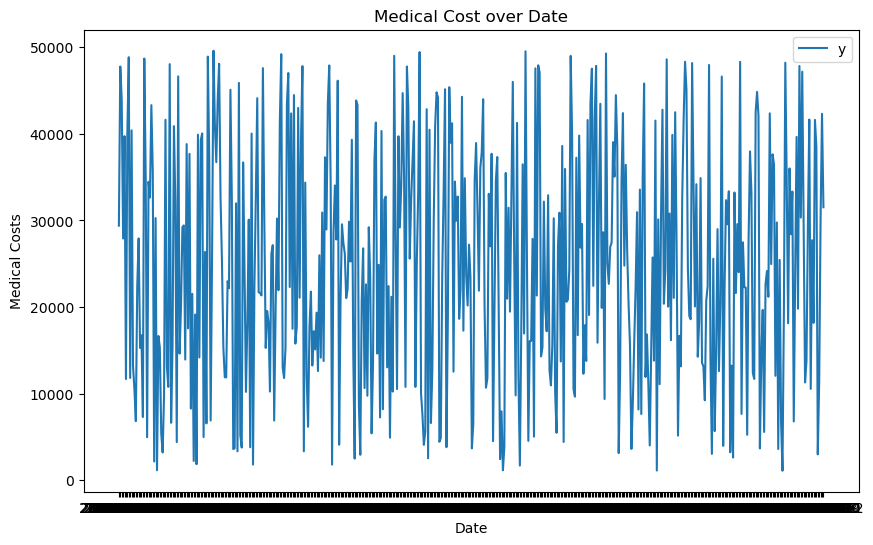

In [104]:
import  matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(data['ds'],data['y'] , label ='y')
plt.xlabel('Date')
plt.ylabel('Medical Costs')
plt.title('Medical Cost over Date')
plt.legend()
plt.show()

In [93]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=gs, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layoutla()

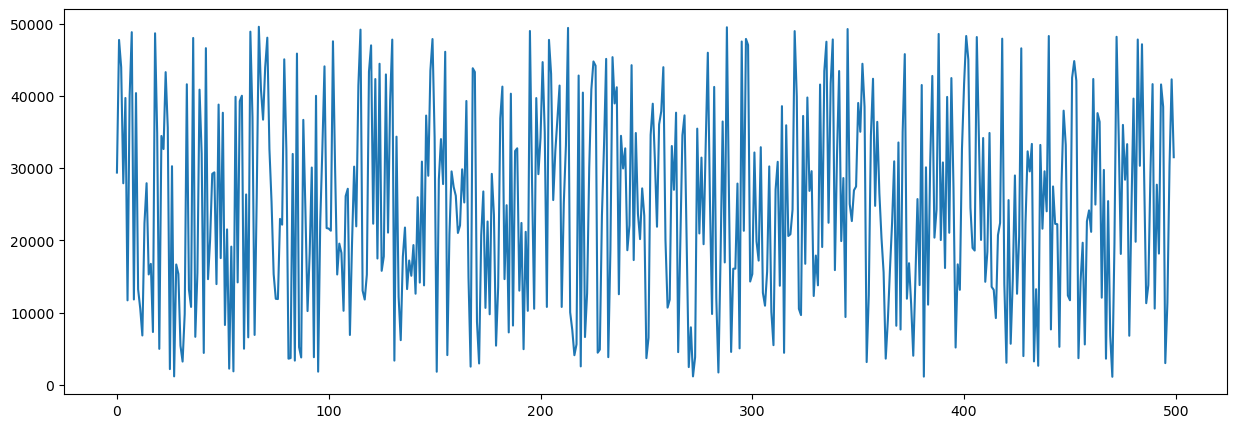

In [105]:
plt.figure(figsize=(15,5))
data['y'].plot();

In [106]:
from prophet import Prophet
#Renaming columns to match Prophet's requirements'
data.rename(columns={'Date' : 'ds', 'Amount': 'y'}, inplace=True)
#Instatiate Prophet object(sibiza iModel/fitting)
m= Prophet()
m.fit(data)

12:57:05 - cmdstanpy - INFO - Chain [1] start processing
12:57:05 - cmdstanpy - INFO - Chain [1] done processing


In [107]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
860,2027-02-08
861,2027-02-09
862,2027-02-10
863,2027-02-11
864,2027-02-12


In [108]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
860,2027-02-08,24500.511097,7299.753414,42099.633966
861,2027-02-09,26777.021241,10440.781669,44014.947502
862,2027-02-10,27622.135439,10007.255529,43638.313134
863,2027-02-11,25873.525822,8611.460420,43187.052125
864,2027-02-12,26571.734415,8260.230516,42825.817676


Predicting future outcomes using Facebook prophet

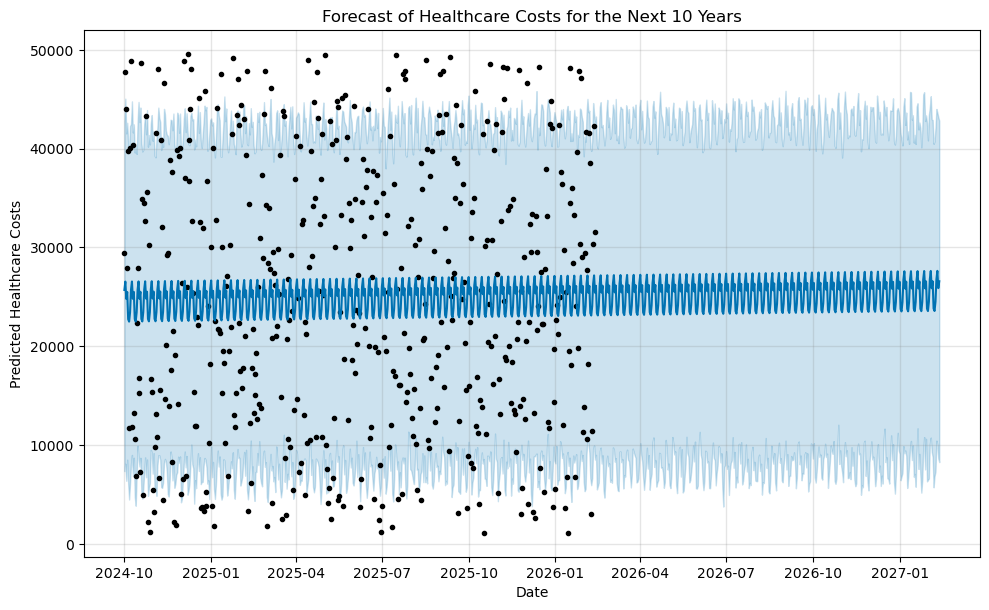

In [109]:
fig = model.plot(forecast)
plt.title('Forecast of Healthcare Costs for the Next 10 Years')
plt.xlabel('Date')
plt.ylabel('Predicted Healthcare Costs')
plt.show()


The Trend of medical cost over time.

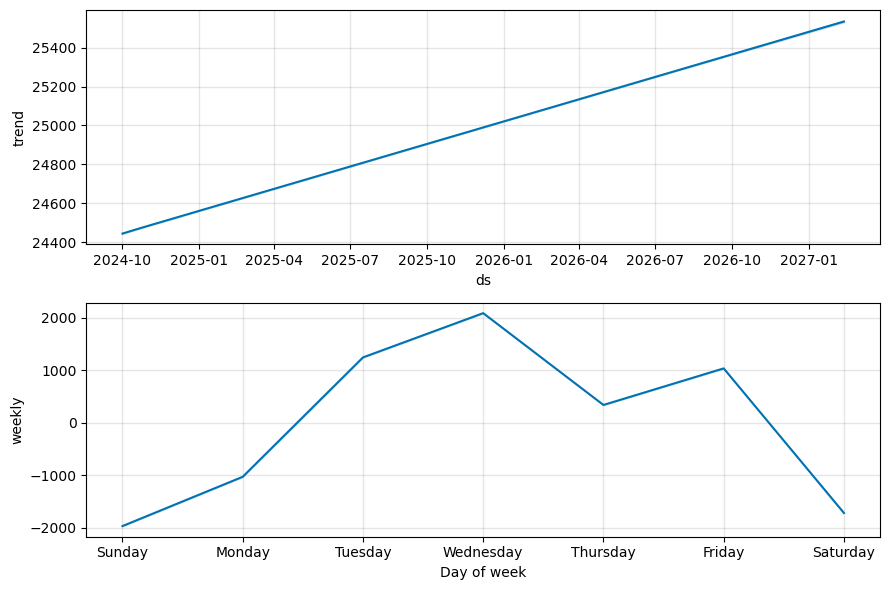

In [110]:
#trend
fig2 = model.plot_components(forecast)
plt.show()

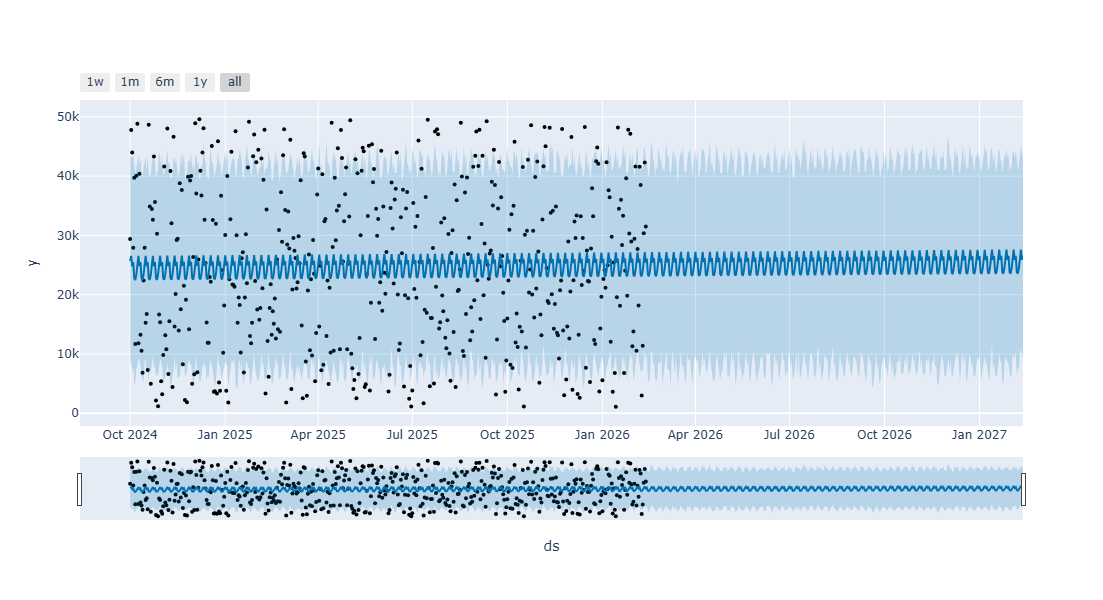

In [100]:
#Allows zooming
from prophet.plot import plot_plotly,plot_components_plotly
plot_plotly(m, forecast)